# Como melhorar o modelo?

Vimos que o modelo inicial só explica 38% da variação dos preços dos imóveis de Melbourne. Precisamos de sua ajuda para melhorar isso!

## Obtendo mais dados

Uma das formas de melhorar o desempenho do modelo é simplesmente obtendo mais dados para treinamento. Lembra dos valores vazios que descartamos? Podemos tentar aproveitar melhor esses dados. Vamos carregar o conjunto de dados novamente.

In [62]:
import pandas as pd

melbourne_file_path = 'melb_data.csv'
melbourne_data = pd.read_csv(melbourne_file_path) 
melbourne_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


Vamos selecionar apenas as colunas que possuem alguns dados vazios (marcados como "NaN" pelo Pandas)

In [63]:
melbourne_data.loc[:,melbourne_data.isnull().any(axis=0)]

,Car,BuildingArea,YearBuilt,CouncilArea
0,1.0,NaN,NaN,Yarra
1,0.0,79.0,1900.0,Yarra
2,0.0,150.0,1900.0,Yarra
3,1.0,NaN,NaN,Yarra
4,2.0,142.0,2014.0,Yarra
5,0.0,NaN,NaN,Yarra
6,0.0,210.0,1910.0,Yarra
7,2.0,107.0,1890.0,Yarra
8,1.0,NaN,NaN,Yarra
9,2.0,75.0,1900.0,Yarra


Existem portanto quatro colunas com dados vazios (Car, BuildingArea, YearBuilt, CouncilArea). As duas primeiras (Car, BuildingArea) são variáveis quantitativas. As duas últimas (YearBuilt, CouncilArea) são categóricas. Observe que embora a coluna YearBuilt ("Ano de construção") seja um número, ela não representa uma quantidade e sim uma categoria de ano.

## Exercício 1 - Preencher os valores vazios das colunas Car, BuildingArea, YearBuilt e CouncilArea. Para as variáveis numéricas Car e BuildingArea o valor preenchido deve ser a mediana da coluna e para as variáveis categóricas YearBuilt e CouncilArea o valor preenchido deve ser a moda da coluna.

Lembrete: Mediana corresponde ao valor que divide um conjunto pela metade. Moda é o valor mais frequente de um conjunto de dados

Dica: Ver a função pandas.DataFrame.isnull() (https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.isnull.html). A mediana e a moda podem ser calculadas pelas funções Dataframe.median() e Dataframe.mode()[0], respectivamente.

## Solução 1

In [64]:
melbourne_data.loc[melbourne_data['Car'].isnull(),'Car'] = melbourne_data['Car'].median()
melbourne_data.loc[melbourne_data['BuildingArea'].isnull(),'BuildingArea'] = melbourne_data['BuildingArea'].median()
melbourne_data.loc[melbourne_data['YearBuilt'].isnull(),'YearBuilt'] = melbourne_data['YearBuilt'].mode()[0]
melbourne_data.loc[melbourne_data['CouncilArea'].isnull(),'CouncilArea'] = melbourne_data['CouncilArea'].mode()[0]

In [65]:
[(coluna, type(melbourne_data[coluna][0])) for coluna in melbourne_data.columns]

[('Suburb', str),
 ('Address', str),
 ('Rooms', numpy.int64),
 ('Type', str),
 ('Price', numpy.float64),
 ('Method', str),
 ('SellerG', str),
 ('Date', str),
 ('Distance', numpy.float64),
 ('Postcode', numpy.float64),
 ('Bedroom2', numpy.float64),
 ('Bathroom', numpy.float64),
 ('Car', numpy.float64),
 ('Landsize', numpy.float64),
 ('BuildingArea', numpy.float64),
 ('YearBuilt', numpy.float64),
 ('CouncilArea', str),
 ('Lattitude', numpy.float64),
 ('Longtitude', numpy.float64),
 ('Regionname', str),
 ('Propertycount', numpy.float64)]

## Adicionando mais atributos no modelo

Além de adicionarmos mais dados preenchendo os valores vazios, podemos escolher mais variáveis como atributos para o modelo. Vamos analisar os tipos de dados de cada coluna do nosso dataset.

In [66]:
[(coluna, type(melbourne_data[coluna][0])) for coluna in melbourne_data.columns]

[('Suburb', str),
 ('Address', str),
 ('Rooms', numpy.int64),
 ('Type', str),
 ('Price', numpy.float64),
 ('Method', str),
 ('SellerG', str),
 ('Date', str),
 ('Distance', numpy.float64),
 ('Postcode', numpy.float64),
 ('Bedroom2', numpy.float64),
 ('Bathroom', numpy.float64),
 ('Car', numpy.float64),
 ('Landsize', numpy.float64),
 ('BuildingArea', numpy.float64),
 ('YearBuilt', numpy.float64),
 ('CouncilArea', str),
 ('Lattitude', numpy.float64),
 ('Longtitude', numpy.float64),
 ('Regionname', str),
 ('Propertycount', numpy.float64)]

Para um modelo de regressão linear, todas as variáveis devem ser numéricas. Porém, algumas colunas de nosso Dataframe possuem tipos não numéricos (str). Precisamos excluir estas colunas ou então transformá-las em valores numéricos.

## Exercício 2 - Excluir todas as colunas do tipo str do Dataframe melbourne_data

## Solução 2 

In [67]:
melbourne_data = melbourne_data.drop(labels = ['Suburb', 'Address','Type','Method','SellerG','Date','CouncilArea',
                                               'Regionname'], axis = 1)

In [68]:
melbourne_data.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,126.0,1970.0,-37.7996,144.9984,4019.0
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,126.0,1970.0,-37.7969,144.9969,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0


## Escolhendo as melhores colunas

Como dissemos, inicialmente neste notebook escolhemos nossos atributos na mão. Talvez haja maneiras mais inteligentes de selecioná-los. Felizmente a biblioteca scikit-learn possui funções para seleção dessas variáveis através do módulo sklearn.feature_selection. Uma dessas funções é a RFECV ("Recursive Feature Elimination with Cross-Validation" ou Eliminação Recursiva de Atributos com Validação Cruzada), que basicamente seleciona as variáveis que mais aumentam o desempenho do modelo.

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV

# Inicialmente, definimos o modelo com todas as variáveis (exceto a vaárivel alvo Price)
y = melbourne_data.Price
X = melbourne_data.loc[:,melbourne_data.columns != 'Price']

# Definir conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Definição do modelo de Regressão Linear
modelo_completo = LinearRegression()

# Definir um novo modelo com base no modelo de Regressão Linear original utilizando a função de seleção de atributos RFECV
modelo_selecionado = RFECV(modelo_completo, scoring = 'r2')

# Ajustar o novo modelo (treinamento)
modelo_selecionado = modelo_selecionado.fit(X_train, y_train)

Podemos entender um pouco como esta função de seleção funciona através do gráfico a seguir.

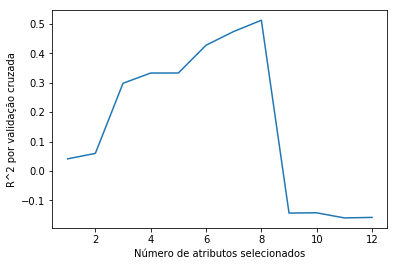

In [70]:
import matplotlib.pyplot as plt

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Número de atributos selecionados")
plt.ylabel("R^2 por validação cruzada")
plt.plot(range(1, len(modelo_selecionado.grid_scores_) + 1), modelo_selecionado.grid_scores_)
plt.show()

Parece que temos oito variáveis que maximizam o desempenho do modelo. Com o objeto "modelo selecionado" resultante da função RFECV(), obtemos o atributo "support_", que nos retorna uma lista de variáveis do tipo booleano com indicações dessas variáveis.

In [71]:
modelo_selecionado.support_

array([ True,  True, False,  True,  True,  True, False, False,  True,
        True,  True, False])

E as oito variáveis selecionadas são:

In [72]:
X.loc[:,modelo_selecionado.support_]

,Rooms,Distance,Bedroom2,Bathroom,Car,YearBuilt,Lattitude,Longtitude
0,2,2.5,2.0,1.0,1.0,1970.0,-37.79960,144.99840
1,2,2.5,2.0,1.0,0.0,1900.0,-37.80790,144.99340
2,3,2.5,3.0,2.0,0.0,1900.0,-37.80930,144.99440
3,3,2.5,3.0,2.0,1.0,1970.0,-37.79690,144.99690
4,4,2.5,3.0,1.0,2.0,2014.0,-37.80720,144.99410
5,2,2.5,2.0,1.0,0.0,1970.0,-37.80410,144.99530
6,3,2.5,4.0,2.0,0.0,1910.0,-37.80240,144.99930
7,2,2.5,2.0,1.0,2.0,1890.0,-37.80600,144.99540
8,1,2.5,1.0,1.0,1.0,1970.0,-37.80080,144.99730
9,2,2.5,3.0,1.0,2.0,1900.0,-37.80100,144.99890


## Exercício 3 - Defina e ajuste um modelo de regressão linear nos dados de treinamento com as variáveis resultantes da seleção pela função RFECV() e mostre os coeficientes dessa regressão

In [73]:
X = X.loc[:,modelo_selecionado.support_]

In [87]:
X.head()

,Rooms,Distance,Bedroom2,Bathroom,Car,YearBuilt,Lattitude,Longtitude
0,2,2.5,2.0,1.0,1.0,1970.0,-37.7996,144.9984
1,2,2.5,2.0,1.0,0.0,1900.0,-37.8079,144.9934
2,3,2.5,3.0,2.0,0.0,1900.0,-37.8093,144.9944
3,3,2.5,3.0,2.0,1.0,1970.0,-37.7969,144.9969
4,4,2.5,3.0,1.0,2.0,2014.0,-37.8072,144.9941


In [76]:
# Definir conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [77]:
melbourne_model = LinearRegression()

In [78]:
# Ajustar o modelo (treinamento)
melbourne_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [81]:
melbourne_model.coef_

array([  246648.48733346,   -39030.36964642,    23377.80722437,
         215258.54287731,    66045.621826  ,    -4678.14978162,
       -1481069.69777763,   908916.71169526])

In [82]:
X.columns

Index(['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'YearBuilt',
       'Lattitude', 'Longtitude'],
      dtype='object')

Temos que as variáveis Rooms, Bedroom2, Bathroom, Car e Longitude aumentam o preço do imóvel e as variáveis Distance, YearBuilt e Lattitude diminuem o valor do imóvel. Entretanto, não sabemos exatamente qual a variável mais importante porque os dados estão em escalas diferentes. Precisamos normalizar os dados para fazermos essa comparação.

## Exercício 4 - Normalize as variáveis do conjunto de treinamento X_train para que todas possuam média igual a 0 e desvio padrão igual a 1. Depois ajuste um novo modelo e veja seus coeficientes.

## Solução 4

Dica: Para normalizar os dados, subtraia os valores das colunas pela média da coluna e divida pelo desvio padrão da coluna. O pandas possui as funções Dataframe.mean() e Dataframe.std() pra isso!

In [90]:
X_train = X_train.copy()
#normalizar todas as colunas de uma só vez:

X_train = (X_train - X_train.mean()) / X_train .std()

In [91]:
X_train.head()

,Rooms,Distance,Bedroom2,Bathroom,Car,YearBuilt,Lattitude,Longtitude
6756,-0.975895,-0.104614,-0.937600,-0.771570,-1.668639,0.100240,0.718720,0.476540
6321,0.067307,-0.610715,0.088291,-0.771570,-0.632091,-2.026841,0.678188,0.009590
12680,-0.975895,-0.003393,-0.937600,0.671634,-0.632091,1.411940,-0.959783,0.499554
9180,1.110510,-0.813155,1.114183,0.671634,0.404456,-2.735868,-0.058215,0.292147
1699,0.067307,0.215917,0.088291,-0.771570,0.404456,0.773816,-1.100123,0.637920


In [92]:
melbourne_model = LinearRegression()

In [101]:
melbourne_model.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [109]:
[(X_train.columns[i], melbourne_model.coef_[i]) for i in range(len(X_train.columns))]

[('Rooms', 236433.9399808501),
 ('Distance', -231359.05681211315),
 ('Bedroom2', 22787.79621353976),
 ('Bathroom', 149153.1456323965),
 ('Car', 63716.91297692792),
 ('YearBuilt', -131959.7084330368),
 ('Lattitude', -116932.39928259695),
 ('Longtitude', 95183.58647797092)]

Agora sim podemos ver que a variável que mais aumenta o preço do imóvel é a de quantidade de quartos (Rooms) e a que mais diminui é a variável Distance (distância para o centro? Não sabemos muito bem o que significa - daí a importância de conhecer os dados antes de ajustarmos qualquer modelo, o que nem sempre fazemos!!!)

## Exercício 5 - Normalize também os dados de teste (X_test) e avalie a medida R<sup>2</sup> do modelo através da função score()

## Solução 5

In [110]:
X_test = X_test.copy()
#normalizar todas as colunas de uma só vez
X_test = (X_test - X_test.mean()) / X_test.std()

In [111]:
print('O coeficiente de determinação (R^2) é:')
print(melbourne_model.score(X_test, y_test))

O coeficiente de determinação (R^2) é:
0.5049368716303946


Se fizermos tudos certo, o R<sup>2</sup> aumentará de 38% para cerca de 50%. Parece pouco, mas é o suficiente pra passar na prova :)